In [1]:
import geopandas
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import requests
import json
import contextily as cx

In [2]:
r = requests.get("https://native-land.ca/api/index.php?maps=territories")
response = r.json()
geoJSON = {
 "type": "FeatureCollection",
 "features": response
}
nativeJson = geopandas.read_file(json.dumps(geoJSON))

In [3]:
laPoly = geopandas.read_file("../dat/City_Boundaries.geojson").to_crs(epsg=3857)
laPoly.plot()

DriverError: ../dat/City_Boundaries.geojson: No such file or directory

<AxesSubplot:>

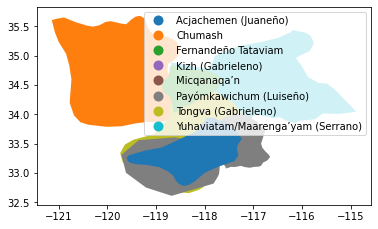

In [ ]:
nativeJson["NameStr"] = nativeJson["Name"].astype(str)
nativeJsonZoom = nativeJson.cx[-118.85:-117.71 , 32.74:34.69]
nativeJsonZoom.plot(
    column="NameStr", 
    legend = True,
    #figsize = (15, 10)
    )

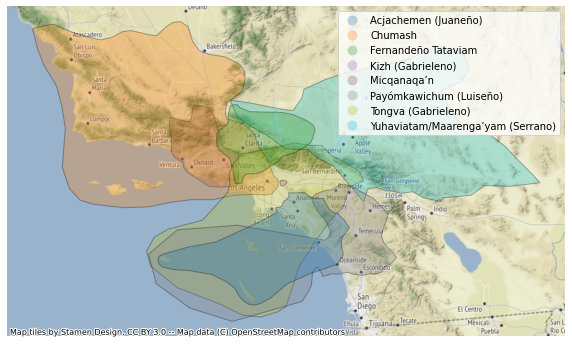

In [ ]:
nativeJsonZoom_c = nativeJsonZoom.to_crs(epsg=3857)

ax = nativeJsonZoom_c.plot(
    column="NameStr", 
    legend = True,
    figsize = (10, 15),
    alpha = 0.3,
    edgecolor = 'k'
    )

ax.set_axis_off()
base = cx.add_basemap(ax=ax, 
crs=nativeJsonZoom_c.crs.to_string(),
#source=cx.providers.OpenStreetMap.Mapnik
 )

In [ ]:
ax.figure.savefig("test.jpg")

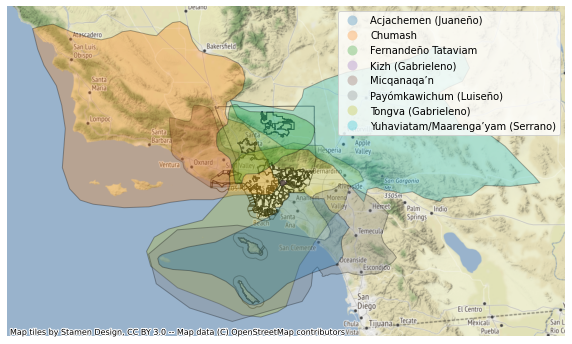

In [ ]:
laPoly = geopandas.read_file("City_Boundaries.geojson").to_crs(epsg=3857)
base = laPoly.plot(facecolor="none", edgecolor="black", figsize = (10, 15), alpha = 0.5)
ax = nativeJsonZoom_c.plot(
    ax = base,
    column="NameStr", 
    legend = True,
    figsize = (10, 15),
    alpha = 0.3,
    edgecolor = 'k'
    )
ax.set_axis_off()
cx.add_basemap(ax=ax, 
crs=nativeJsonZoom_c.crs.to_string(),
#source=cx.providers.OpenStreetMap.Mapnik
 )

In [ ]:
base

In [ ]:
import matplotlib.pyplot as plt
base.show()

AttributeError: 'NoneType' object has no attribute 'show'

In [ ]:
type(nativeJson)

geopandas.geodataframe.GeoDataFrame